In [ ]:
!pip install bnlp_toolkit

In [ ]:
!pip install bnltk

In [ ]:
!pip install -U bnlp_toolkit


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from bnlp.corpus import stopwords
from bnlp.corpus.util import remove_stopwords

from bnltk.stemmer import BanglaStemmer

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data/AI/Book Review.csv')

In [ ]:
data.head(10)

,Review,Class
0,অনেক কিছু শিখার আছে এই বই থেকে।,1
1,এই বইয়ের অনুবাদ টি অন্যান্য বই থেকে ভাল আমার ক...,1
2,খুব ভাল লাগলো,1
3,বইটা খুবই ভালো.... যারা এখনো না কিনছে তাদের অব...,1
4,বস একটা বই,1
5,অনেক জোস,1
6,নিজের অবস্থান বুঝতে পারার জন্য একবার হলেও পড়া ...,1
7,বেশ ভাল,1
8,বইটি পুরাই জুস,1
9,কিছু বই থাকে যগুলা পড়লেই নেশা কাজ করে। এই বইটা...,1


Negative: 35000.00%, Positive: 35000.00%


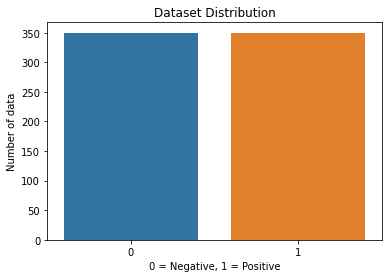

In [ ]:
import seaborn as sns
target_vc = data["Class"].value_counts(normalize=False)
print("Negative: {:.2%}, Positive: {:.2%}".format(target_vc[0], target_vc[1]))
sns.barplot(x=target_vc.index, y=target_vc)
plt.title("Dataset Distribution")
plt.xlabel("0 = Negative, 1 = Positive")
plt.ylabel("Number of data")
plt.show()

In [ ]:
data.shape

(700, 2)

In [ ]:
#cleaning the texts
import re
corpus=[]
for i in range(0,700):
    review = re.sub('[‘’“”…,।.?/()\!:;{}"]', ' ', data['Review'][i])
    review = re.sub('\n', '', review)
    bn_stemmer = BanglaStemmer()
    review=bn_stemmer.stem(review)
    review = remove_stopwords(review, stopwords)
    review=' '.join(review)
    corpus.append(review)
corpus

['শিখার বই',
 'বইয়ের অনুবাদ অন্যান্য বই ভাল হয়েছে',
 'ভাল লাগলো',
 'বইটা খুবই ভালো এখনো কিনছে অবশ্যই কিনা ধন্যবাদ আয়মান ভাইকে একটা বই দেওয়ার',
 'বস একটা ব',
 'জোস',
 'অবস্থান বুঝতে পারার পড়া দরকার বইটি ধন্যবাদ আয়মান সাাদিক অন্তিক মাহমুদ স্পেশালি রকমারিকে ধন্যবাদ বইটি পৌছে দেয়ার',
 'ভাল',
 'বইটি পুরাই জুস',
 'বই যগুলা পড়লেই নেশা বইটাওও তেমনি যতটুকু পড়ে বুঝলাম নেশার মত ভাল লাগা হাতে পাওয়ার অপেক্ষায়',
 'অস্থির ভাই অসাধারণ একটা ব\u200cই',
 'ভাললাগসে',
 'খুবই ভালো হয়েছে বইটা',
 'পারফেক্ট একটা ব',
 'পড়ে আনন্দ পেয়েছি',
 'বাংলাভাষায় মোটিভেশনের চেয়ে ভালো বই সবচেয়ে বড় কথা যতবারই পড়বেন ততবারই ভালো লাগবে সর্দি সারানোর টনিক মধু লেবুর রস হতাশা দূর হারবাল চিকিৎসা হোল বইটি',
 'ভালো বই আত্মিক উন্নতি সাধন সম্ভব',
 'বই পড়ে জীবন পাল্টে জীবনের পড়া বইগুলোর সবচাইতে সেরা বই বইয়ের লেখককে ধন্যবাদ সুন্দর বই রচনা এক কথায় বইয়ের লেখকের ফ্যান হয়ে গিয়েছি 3',
 'ভালো একটা বই মন কনট্রোল ভালো একটা বই',
 'বইটি খুবই ভালো',
 'হোয়াট আ বুক বস এতদিন অপেক্ষায় ছিলাম চৌমুহনীতে ভক্ত বস সবাই মিলে বই মেলায় আসবো শুক্রবারে সাথে সেলফি 

In [ ]:
# TF-IDF process
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer()
X= cv.fit_transform(corpus).toarray()
y= data.iloc[:, 1].values
print(X)
print(y)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 

In [ ]:
#Splitting the dataset into training set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=0, stratify=data['Class'])
print(X)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
X_train.shape

(560, 1162)

# **Decision Tree**

In [ ]:
# Fitting Decision Tree to the training set
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion="entropy", random_state=0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
#predicting the Test set results
y_pred=classifier.predict(X_test)

In [ ]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[50 20]
 [19 51]]


In [ ]:
#finding accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.7214285714285714


In [ ]:
#finding Recall
from sklearn.metrics import recall_score
recall=recall_score(y_test,y_pred,average="binary")
print('Recall %.3f'%recall)

Recall 0.729


In [ ]:
#finding Precision
from sklearn.metrics import precision_score
precision=precision_score(y_test,y_pred,average="binary")
print('precision %.3f'%precision)

precision 0.718


In [ ]:
#finding F1-score
from sklearn.metrics import f1_score
f1=f1_score(y_test,y_pred,average="binary")
print('f1_score %.3f'%f1)

f1_score 0.723


# **K Nearest Neighbor**

In [ ]:
# Fitting KNN to the training set
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier(n_neighbors=4,metric='minkowski',p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [ ]:
#predicting the Test set results
y_pred=classifier.predict(X_test)

In [ ]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[21 49]
 [15 55]]


In [ ]:
#finding accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.5428571428571428


In [ ]:
#finding Recall
from sklearn.metrics import recall_score
recall=recall_score(y_test,y_pred,average="binary")
print('Recall %.3f'%recall)

Recall 0.786


In [ ]:
#finding Precision
from sklearn.metrics import precision_score
precision=precision_score(y_test,y_pred,average="binary")
print('precision %.3f'%precision)

precision 0.529


In [ ]:
#finding F1-score
from sklearn.metrics import f1_score
f1=f1_score(y_test,y_pred,average="binary")
print('f1_score %.3f'%f1)

f1_score 0.632


# **Support Vector Machine**

In [ ]:
# Fitting SVM to the training set
from sklearn.svm import SVC
classifier = SVC(kernel='linear')
classifier.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
#predicting the Test set results
y_pred=classifier.predict(X_test)

In [ ]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[60 10]
 [10 60]]


In [ ]:
#finding accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.8571428571428571


In [ ]:
#finding Recall
from sklearn.metrics import recall_score
recall=recall_score(y_test,y_pred,average="binary")
print('Recall %.3f'%recall)

Recall 0.857


In [ ]:
#finding Precision
from sklearn.metrics import precision_score
precision=precision_score(y_test,y_pred,average="binary")
print('precision %.3f'%precision)

precision 0.857


In [ ]:
#finding F1-score
from sklearn.metrics import f1_score
f1=f1_score(y_test,y_pred,average="binary")
print('f1_score %.3f'%f1)

f1_score 0.857


# **Multinomial Naive Bayes**


In [ ]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB().fit(X_train, y_train)

In [ ]:
#predicting the Test set results
y_pred=classifier.predict(X_test)

In [ ]:
#Making the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[56 14]
 [ 9 61]]


In [ ]:
#finding accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.8357142857142857


In [ ]:
#finding Recall
from sklearn.metrics import recall_score
recall=recall_score(y_test,y_pred,average="binary")
print('Recall %.3f'%recall)

Recall 0.871


In [ ]:
#finding Precision
from sklearn.metrics import precision_score
precision=precision_score(y_test,y_pred,average="binary")
print('precision %.3f'%precision)

precision 0.813


In [ ]:
#finding F1-score
from sklearn.metrics import f1_score
f1=f1_score(y_test,y_pred,average="binary")
print('f1_score %.3f'%f1)

f1_score 0.841


# **Random Forest**

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(data['Review'],data['Class'],test_size=0.2,random_state=0,shuffle=True, stratify=data['Class'])

In [ ]:
# Fitting Random Forest to the training set
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
classifier=Pipeline([('tfidf',TfidfVectorizer()),('classifier',RandomForestClassifier(n_estimators=100,n_jobs=-1))])
classifier.fit(X_train, y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier(n_jobs=-1))])

In [ ]:
#predicting the Test set results
y_pred=classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
print(cm)

[[56 14]
 [ 6 64]]


In [ ]:
#finding accuracy
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.8571428571428571


In [ ]:
#finding Recall
from sklearn.metrics import recall_score
recall=recall_score(y_test,y_pred,average="binary")
print('Recall %.3f'%recall)

Recall 0.914


In [ ]:
#finding Precision
from sklearn.metrics import precision_score
precision=precision_score(y_test,y_pred,average="binary")
print('precision %.3f'%precision)

precision 0.821


In [ ]:
#finding F1-score
from sklearn.metrics import f1_score
f1=f1_score(y_test,y_pred,average="binary")
print('f1_score %.3f'%f1)

f1_score 0.865
